## RFM Model for Customer Segmentation

RFM analysis allows marketers to target specific clusters of customers with communications that are much more relevant for their particular behavior – and thus generate much higher rates of response, plus increased loyalty and customer lifetime value.

RFM stands for recency, frequency and monetary.

Marketers typically have extensive data on their existing customers – such as purchase history, browsing history, prior campaign response patterns and demographics – that can be used to identify specific groups of customers that can be addressed with offers very relevant to each.

**Recency** is simply the amount of time since the customer’s most recent transaction (most businesses use days, though for others it might make sense to use months, weeks or even hours instead).

**Frequency** is the total number of transactions made by the customer (during a defined period).

**Monetary** is the total amount that the customer has spent across all transactions (during a defined period).

We calculate these three quantities for each unique customer and then, We use the RFM values for K-means segmentation.


**Importing the libraries**

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [ ]:

data= pd.read_csv('Ecommerce.csv',encoding='unicode_escape')
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,0.0
unique,25900,4070,4223,NaN,305,NaN,NaN,38,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,3-Dec-17,NaN,NaN,United Kingdom,NaN
freq,1114,2313,2369,NaN,5331,NaN,NaN,495478,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN,NaN


## Explanation for unrealistic values

** Note that the minimum value of Unit Price is negative which is impractical.



In [ ]:
data.loc[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
299983,A563186,B,Adjust bad debt,1,10-Aug-17,-11062.06,NaN,United Kingdom,NaN
299984,A563187,B,Adjust bad debt,1,10-Aug-17,-11062.06,NaN,United Kingdom,NaN


**Note that these are special kinds of transactions. More information regarding them is given in the UCI Machine Learning Data Repository

In [ ]:
data.loc[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
141,C536379,D,Discount,-1,29-Nov-16,27.50,14527.0,United Kingdom,NaN
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,29-Nov-16,4.65,15311.0,United Kingdom,NaN
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,29-Nov-16,1.65,17548.0,United Kingdom,NaN
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom,NaN
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,7-Dec-17,0.83,14397.0,United Kingdom,NaN
541541,C581499,M,Manual,-1,7-Dec-17,224.69,15498.0,United Kingdom,NaN
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,7-Dec-17,10.95,15311.0,United Kingdom,NaN
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,7-Dec-17,1.25,17315.0,United Kingdom,NaN


**These are those Rows which have negative values for Quantity. The negative value means that these transactions are cancelled. They have special invoice numbers starting with C  

In [ ]:
data=data.drop(columns='Unnamed: 8')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Dealing with the missing values

In [ ]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

** This provides the sum of the missing values under the respective column headings. We see that that there are a lot of rows with missing Customer IDs

In [ ]:
data['CustomerID']= data['CustomerID'].replace(np.NaN,0)
        

    

    
    

** Replaced all the missing Custimer IDs with Zero

In [ ]:
len(np.unique(data['CustomerID']))

4373

** Number of unique customers

In [ ]:
# All the rows containing missing data values

missing_customer=data.loc[data['CustomerID']== 0]
list_invoice=[]
for i in range(len(missing_customer)):
    list_invoice.append(missing_customer.iloc[i]['InvoiceNo'])
list_invoice= np.unique(list_invoice)
cust_id={}
for i in list_invoice:
    t=list(np.where(data['InvoiceNo']==i))
    for j in t[0]:
        if data.loc[j,'CustomerID']==0:
            continue
        else:
            cust_id[i]=data.loc[j,'CustomerID']

print("There are {} unique customer IDs in the missing rows".format(len(list_invoice)))
print('The total number of unique customer IDs in the dataframe is {}'.format(len(np.unique(data['CustomerID']))))
print('Length of Cust_id is {}'.format(len(cust_id)))




** The above code is based on the idea that two rows with the same invoice number will definitely have the same customer ID . Therefore an attempt has been made to replace the missing customer ID value of a row with the ID from a row which has the same Invoice No. as that of the former with a non-zero Customer ID value. There is no such row as the length of the dictionary is zero. Since the 135,080 rows with mssing customer IDs have around 3000 unique Invoice No. .i.e  around 3000 unique customers. To include these rows for RFM moodelling, I will replace these missing Values with unique customer ID values completely separate from the ones already in the dataset. 

In [ ]:
for i in list_invoice:
    m=list(np.where(data['InvoiceNo']==i))
    x=np.random.randint(20000,38000)
    for j in m[0]:
        if data.iloc[j]['CustomerID']!=0:
            continue
        else:
            data.loc[j,'CustomerID']=x


** Missing Values replaced

Note: All missing Customer ID values in the original dataframe replaced.

## Getting rid of Duplicate Rows

In [ ]:
print("Number of duplicate rows is {}".format(data.duplicated().sum()))

Number of duplicate rows is 5269


In [ ]:
data= data.drop_duplicates()

print('Duplicate rows dropped')

Duplicate rows dropped


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536640 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536640 non-null  object 
 1   StockCode    536640 non-null  object 
 2   Description  535186 non-null  object 
 3   Quantity     536640 non-null  int64  
 4   InvoiceDate  536640 non-null  object 
 5   UnitPrice    536640 non-null  float64
 6   CustomerID   536640 non-null  float64
 7   Country      536640 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
data.Country=data.Country.replace(['EIRE'],['Ireland'])

## Data Exploration

Let's have a look at the number of orders per Nation

<AxesSubplot:>

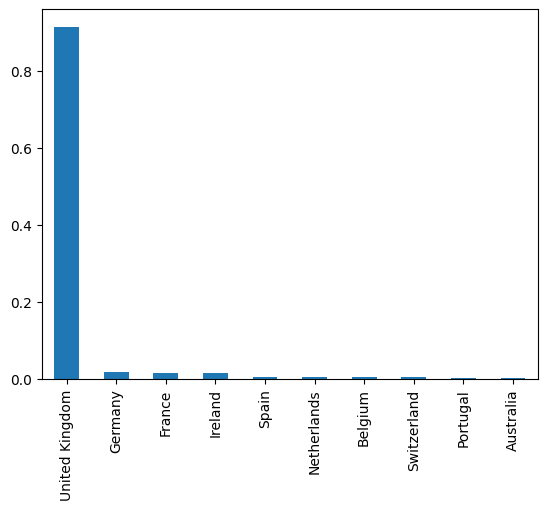

In [ ]:
data.Country.value_counts(normalize=True)[:10].plot(kind='bar')

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536640.000000,536640.000000,536640.000000
mean,9.620043,4.632661,18811.722960
std,219.130360,97.233208,6789.321964
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,16255.000000
75%,10.000000,4.130000,20192.000000
max,80995.000000,38970.000000,37999.000000


In [ ]:
relevant_data=data.drop(['StockCode','Description'],axis=1)
relevant_data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,6,29-Nov-16,3.39,17850.0,United Kingdom


## RFM Analysis

**Recency**

In [ ]:
data_recency= data[['CustomerID','InvoiceDate']]
data_recency['Recency']=data_recency['InvoiceDate'].map(lambda x : (datetime.now()-datetime.strptime(x, '%d-%b-%y')).days)

data_recency=pd.DataFrame(data_recency.groupby('CustomerID',as_index=False)['Recency'].min()) 
data_recency.head()

/var/folders/85/tt6k5_h12qsgwhr9kvl_f4hr0000gn/T/ipykernel_2444/3727783355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_recency['Recency']=data_recency['InvoiceDate'].map(lambda x : (datetime.now()-datetime.strptime(x, '%d-%b-%y')).days)


,CustomerID,Recency
0,12346.0,2210
1,12347.0,1887
2,12348.0,1960
3,12349.0,1903
4,12350.0,2195


**Frequency**

In [ ]:
data_frequency=pd.DataFrame(data['CustomerID'])
data_frequency['CustomerID_2']=data_frequency['CustomerID']

data_frequency=data_frequency.groupby('CustomerID',as_index=False)['CustomerID_2'].size()

data_frequency=data_frequency.rename(columns={'size':'Frequency'})

data_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


**Monetary**

In [ ]:
data_monetary=data[['CustomerID','Quantity','UnitPrice']]
data_monetary['total_bill']=data['Quantity']*data['UnitPrice']
data_monetary=pd.DataFrame(data_monetary.groupby('CustomerID',as_index=False)['total_bill'].sum())
data_monetary=data_monetary.rename(columns={'total_bill':'Monetary'})
data_monetary.head()








/var/folders/85/tt6k5_h12qsgwhr9kvl_f4hr0000gn/T/ipykernel_2444/2214256884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_monetary['total_bill']=data['Quantity']*data['UnitPrice']


,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
RFM = pd.merge(data_monetary,data_frequency,on ='CustomerID')

RFM=pd.merge(RFM,data_recency,on='CustomerID')
RFM

## RFM scores

In [257]:
RFM['r_percentile'] = RFM['Recency'].rank(pct=True,ascending=False)
RFM['r_score'] = pd.cut(RFM['r_percentile'], 4, labels=range(4,0,-1))
RFM['f_percentile'] = RFM['Frequency'].rank(pct=True,ascending=True)
RFM['f_score'] = pd.cut(RFM['f_percentile'], 4, labels=range(4,0,-1))
RFM['m_percentile'] = RFM['Monetary'].rank(pct=True,ascending=True)
RFM['m_score'] = pd.cut(RFM['m_percentile'], 4, labels=range(4,0,-1))

** This is the Quartile method , which is used for segregating RFM values into different bins. The rank method is used to rank diffrent RFM values. (pct=True) represents rank as percentiles. For ex- For an array list(range(1,11)), the rank of element 1 shall be .1 and that of 10 shall be 1.0. The cut method of pandas simply assigns bins to each of the RFM values on the bases of the percentile values with each bin size being equal. Bin labels are from 1 to 4.

In [317]:
RFM['rfm_score'] =RFM['r_score'].astype(str) + RFM['f_score'].astype(str) +RFM['m_score'].astype(str)
RFM

,CustomerID,Monetary,Frequency,Recency,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,rfm_score,groups
0,12346.0,0.00,2,2210,0.066235,4,0.285936,4,0.144848,4,444,0
1,12347.0,4310.00,182,1887,0.970642,1,0.898250,1,0.946468,1,111,0
2,12348.0,1797.24,31,1960,0.533571,2,0.575308,2,0.835386,1,221,0
3,12349.0,1757.55,73,1903,0.816202,1,0.749773,2,0.830719,1,121,0
4,12350.0,334.40,17,2195,0.092223,4,0.465327,3,0.505250,2,432,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7710,37980.0,6.70,2,2126,0.214323,4,0.285936,4,0.283992,3,443,1
7711,37984.0,-2.10,1,2153,0.146792,4,0.132793,4,0.027738,4,444,1
7712,37993.0,0.00,1,1957,0.546014,2,0.132793,4,0.144848,4,244,1
7713,37995.0,24.85,8,1900,0.846209,1,0.377058,3,0.313415,3,133,1


Plot on the bases of the RFM score

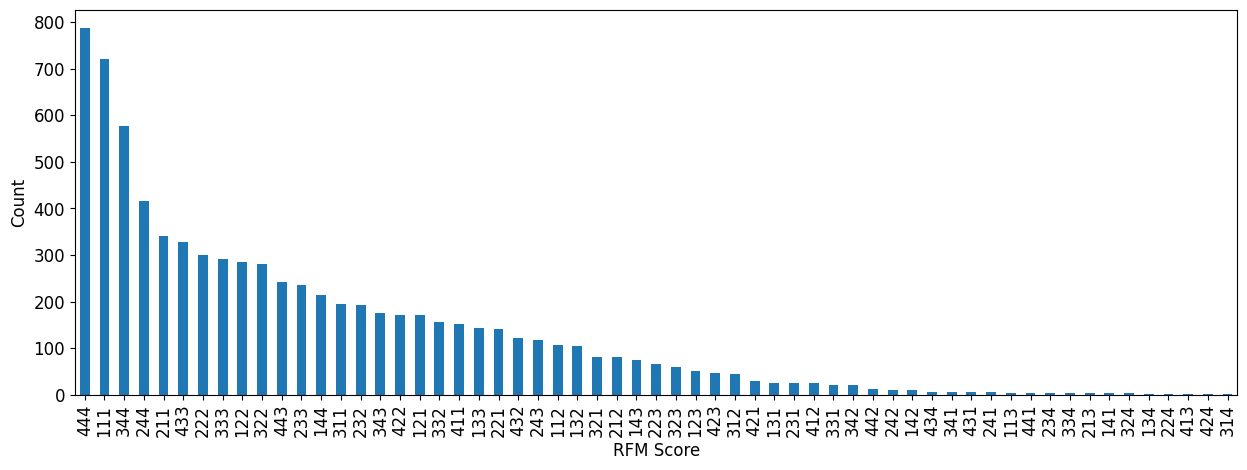

In [262]:
ax =RFM['rfm_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

## K-Means Clustering

In [274]:
RFM_2=RFM[['CustomerID','Monetary','Recency','Frequency']].copy()
RFM_2

,CustomerID,Monetary,Recency,Frequency
0,12346.0,0.00,2210,2
1,12347.0,4310.00,1887,182
2,12348.0,1797.24,1960,31
3,12349.0,1757.55,1903,73
4,12350.0,334.40,2195,17
...,...,...,...,...
7710,37980.0,6.70,2126,2
7711,37984.0,-2.10,2153,1
7712,37993.0,0.00,1957,1
7713,37995.0,24.85,1900,8


## Finding the K in K-means clustering using Gap Statistic method

There are several ways of selecting the optimum number of clusters for K-means clustering, like elbow method, Hierarchal graphs.

I have chosen a method called Gap Statistic method.

The gap statistic compares the total within intra-cluster variation for different values of k with their expected values under null reference distribution of the data. **Null reference distribution of data** refers to generating random samples of testing data. The estimate of the optimal clusters will be value that maximize the gap statistic (i.e, that yields the largest gap statistic). This means that the clustering structure is far away from the random uniform distribution of points.

**Null reference distribution of data** refers to generating random samples of testing data.

In [297]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    global resultsdf
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        
        refDisps = np.zeros(nrefs)
        
        for i in range(nrefs):
            
            
            randomReference = np.random.random_sample(size=data.shape)
            
           
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
   
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
     
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [ ]:
k=pd.DataFrame(optimalK(RFM_2))


In [299]:
resultsdf

,clusterCount,gap
0,1.0,-19.519012
1,2.0,-19.062269
2,3.0,-18.535295
3,4.0,-18.351799
4,5.0,-18.041805
5,6.0,-17.914431
6,7.0,-17.844088
7,8.0,-17.743234
8,9.0,-17.591757
9,10.0,-17.532867


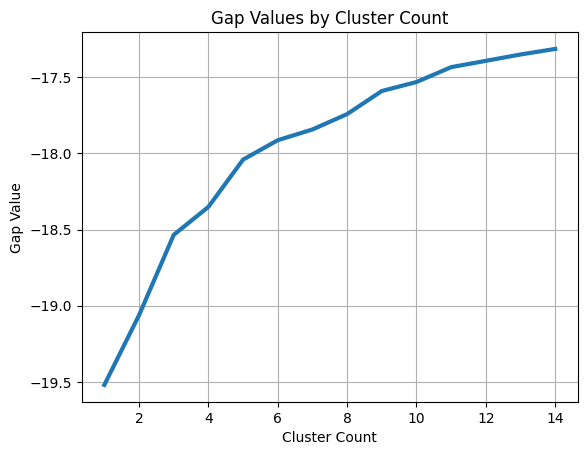

In [301]:
plt.plot(resultsdf.clusterCount, resultsdf.gap, linewidth=3)
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

** We choose 6 as the number of clusters for segmenting the customers on the bases of RFM values. Note that a higher gap value is an indication of a more optimum cluster number.

In [302]:
def plots_model():    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for x in RFM_2.groups.unique():        
        xs = RFM_2[RFM_2.groups == x]['Recency']
        zs = RFM_2[RFM_2.groups == x]['Frequency']
        ys = RFM_2[RFM_2.groups == x]['Monetary']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label = x)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('Monetary')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

## 3D plot for the created groups

In [305]:
model_1 = KMeans(n_clusters=6, init='k-means++', max_iter=3000)
groups = model_1.fit_predict(RFM_2)
RFM_2['groups'] = groups

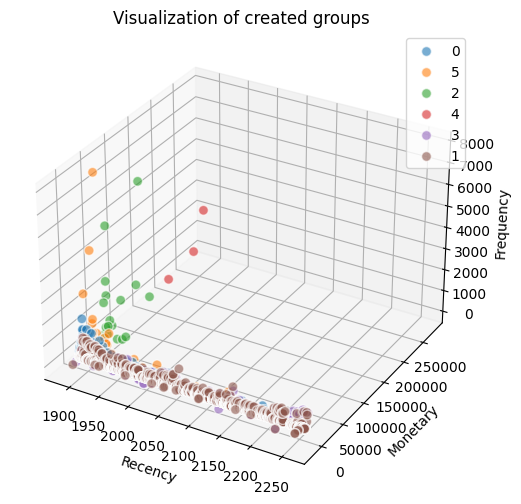

In [306]:
plots_model()


In [308]:
RFM_2.groupby('groups').agg(['mean'])

,CustomerID,Monetary,Recency,Frequency
,mean,mean,mean,mean
groups,,,,
0,15308.986824,1152.637264,1978.822353,76.573412
1,33552.417365,376.300874,2057.258683,40.694611
2,16726.176471,69216.398235,1894.882353,1342.823529
3,24463.834334,377.468920,2061.692077,38.972389
4,16732.666667,241083.226667,1888.000000,956.000000
5,15508.431193,15321.839908,1907.724771,482.743119


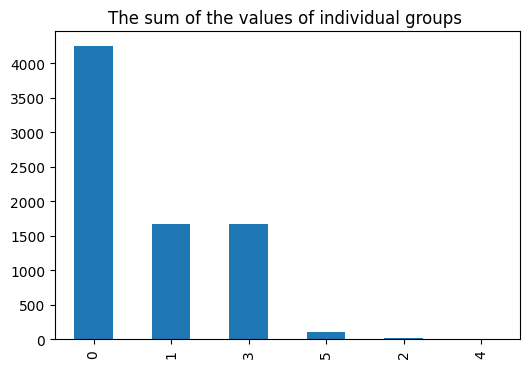

In [309]:
RFM_2.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups',yticks=np.arange(0,));

In [312]:
RFM.groupby('groups').agg(['mean'])

/var/folders/85/tt6k5_h12qsgwhr9kvl_f4hr0000gn/T/ipykernel_2444/88744211.py:1: FutureWarning: ['r_score', 'f_score', 'm_score'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  RFM.groupby('groups').agg(['mean'])


,CustomerID,Monetary,Frequency,Recency,r_percentile,f_percentile,m_percentile,rfm_score
,mean,mean,mean,mean,mean,mean,mean,mean
groups,,,,,,,,
0,15309.292098,1155.973910,76.780574,1978.779163,0.589363,0.624886,0.631861,inf
1,33552.417365,376.300874,40.694611,2057.258683,0.376740,0.321715,0.309616,inf
2,16732.666667,241083.226667,956.000000,1888.000000,0.963318,0.980341,0.999870,3.703704e+07
3,15500.028037,15454.092150,482.102804,1908.112150,0.859663,0.914200,0.990231,inf
4,24463.834334,377.468920,38.972389,2061.692077,0.367777,0.328263,0.317130,inf
5,16726.176471,69216.398235,1342.823529,1894.882353,0.899020,0.945603,0.998574,6.535948e+48


In [313]:
prime_customers = RFM_2[RFM_2["groups"] == 0].drop("groups", axis=1)

In [314]:
prime_customers.describe()

,CustomerID,Monetary,Recency,Frequency
count,4250.000000,4250.000000,4250.000000,4250.000000
mean,15308.986824,1152.637264,1978.822353,76.573412
std,1719.286757,1391.674875,101.195644,109.966964
min,12346.000000,-4287.630000,1885.000000,1.000000
25%,13826.250000,285.372500,1902.000000,17.000000
50%,15314.500000,621.160000,1936.000000,39.000000
75%,16783.500000,1462.372500,2033.000000,94.000000
max,18287.000000,8221.090000,2258.000000,1667.000000


In [315]:
VIP_Clients = RFM_2[(RFM_2["groups"] == 0) & (RFM_2["Recency"] < 1902) & (RFM_2["Frequency"] > 94) & (RFM_2["Monetary"] > 1462.37)]

In [316]:
VIP_Clients

,CustomerID,Monetary,Recency,Frequency,groups
1,12347.0,4310.00,1887,182,0
12,12359.0,6182.98,1892,251,0
15,12362.0,5154.58,1888,274,0
34,12388.0,2780.66,1900,100,0
39,12395.0,2998.28,1900,159,0
...,...,...,...,...,...
4330,18229.0,7276.90,1896,164,0
4340,18241.0,2058.09,1894,105,0
4342,18245.0,2507.56,1892,177,0
4361,18272.0,3064.78,1887,170,0


These VIP clients ace in all the three parameters of RFM model and therefore are eligible for special status by the virtue of customer loyalty.